# Black Friday Data Analysis

This notebook is a analysis of the sales data from a certain retail store on the Black Friday Sale

The dataset is available on Kaggle: https://www.kaggle.com/mehdidag/black-friday/downloads/black-friday.zip/1

## Import all the required libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, r2_score, confusion_matrix
import sklearn.model_selection as curves
import statsmodels.formula.api as sm

import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [0]:
def preprocess():
    #Importing the datasets
    dataset = pd.read_csv('data/BlackFriday.csv')
    dataset = dataset.loc[0:50000]

    dataset['Age'] = dataset['Age'].map(lambda x: x.rstrip('+'))
    dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].map(lambda x: x.rstrip('+')).astype(int)
    
    dataset["Age"] = dataset['Age'].map(lambda x: (int(x.split("-")[0]) + int(x.split("-")[-1]))/2)

    # We do not need UserID and Product ID attributes
    #dataset.drop(columns = ["User_ID","Product_ID", "City_Category", "Stay_In_Current_City_Years"],inplace=True)
    
    dataset.drop(columns = ["City_Category"],inplace=True)
    dataset.Product_ID = dataset.Product_ID.str.replace('P', '')
    
    # One Hot Encoding of the data
    dataset = pd.get_dummies(dataset, drop_first = True, columns = ["Gender"], prefix = None)

    return dataset

## Fill in the missing values of the dataset in Product_Category_2 and Product_Category_3

In [0]:
def missingValues(dataset):
    # Fill missing values
    dataset['Product_Category_2'] = dataset['Product_Category_2'].fillna((dataset['Product_Category_2'].median())).astype('int')
    dataset['Product_Category_3'] = dataset['Product_Category_3'].fillna((dataset['Product_Category_3'].median())).astype('int')
    return dataset

## Visualize the count graphs of the vital attributes

In [0]:
def visualize(dataset):
    fig, ax =plt.subplots(1,2, figsize=(20,10))
    sns.countplot(dataset['Gender_M'], ax=ax[0])
    sns.countplot(dataset['Occupation'], ax=ax[1])
    fig.show()
    fig, ax =plt.subplots(1,2, figsize=(20,10))
    sns.countplot(dataset['Marital_Status'], ax=ax[0])
    sns.countplot(dataset['Product_Category_1'], ax=ax[1])
    fig.show()
    fig, ax =plt.subplots(1,2, figsize=(20,10))
    sns.countplot(dataset['Product_Category_2'], ax=ax[0])
    sns.countplot(dataset['Product_Category_3'], ax=ax[1])
    fig.show()

In [0]:
def getVariables(dataset, column):
    dataview = dataset
    y = dataview[column]
    dataview = dataview.drop(columns = [column])
    print(dataview.head())
    return dataview.values, y.values

In [0]:
def splitTrainAndTest(X,y):
    from sklearn.model_selection import train_test_split
    return train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 13)

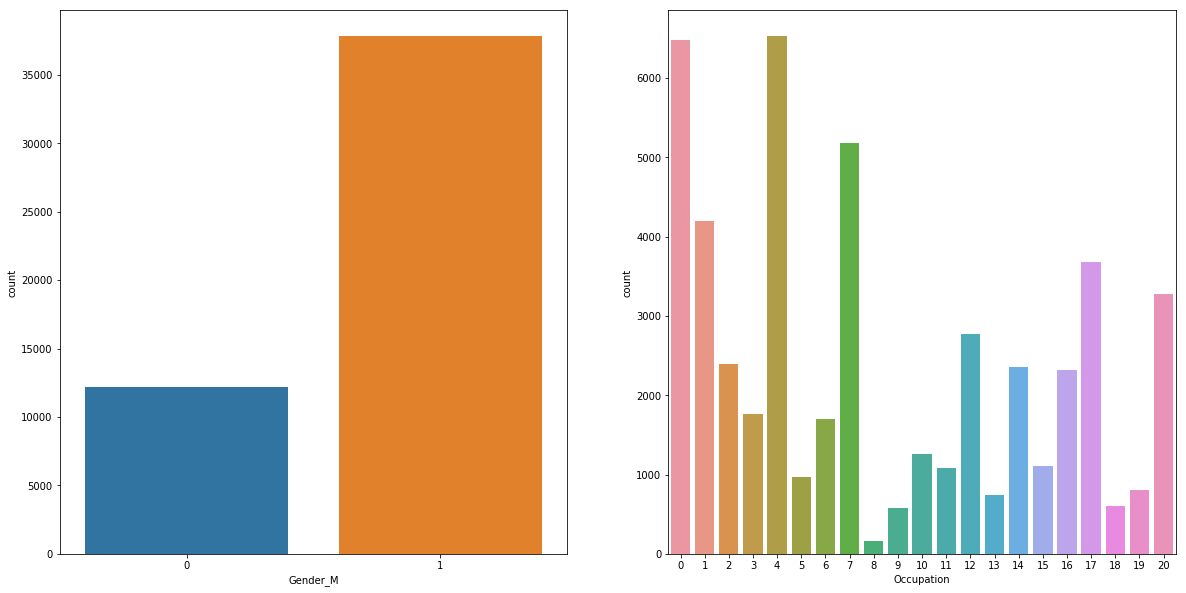

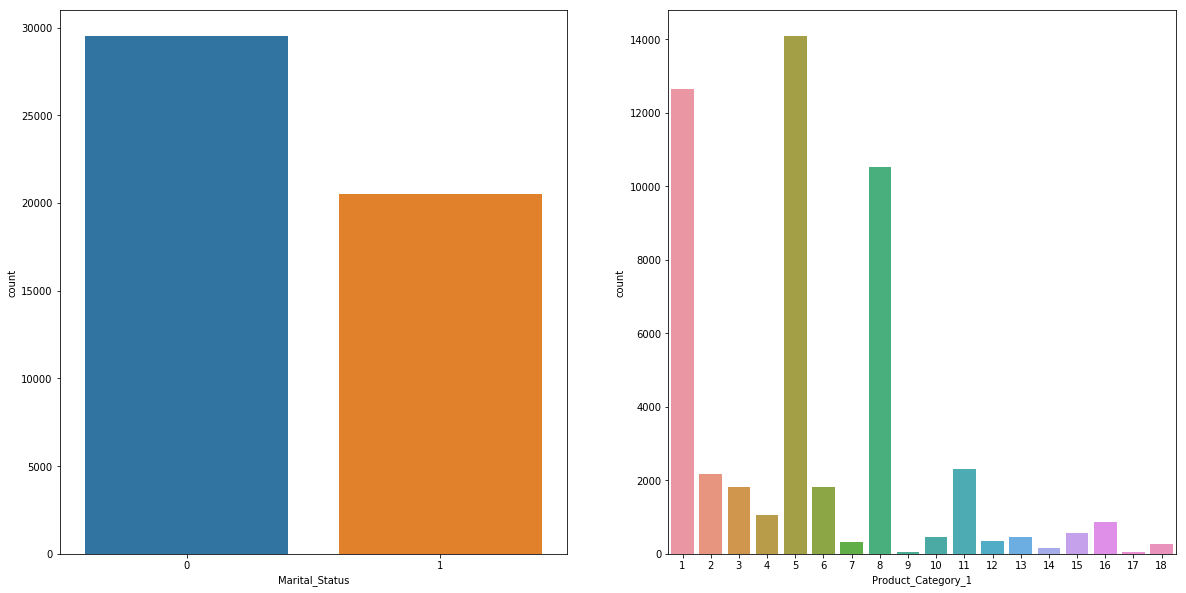

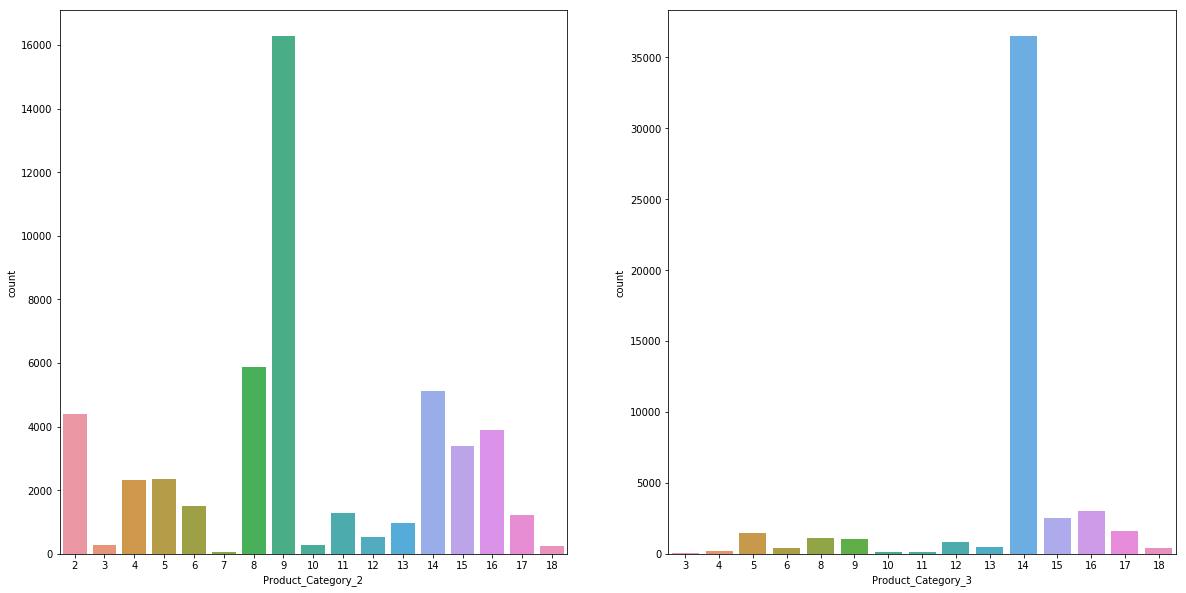

In [0]:
dataset = preprocess()
dataset = missingValues(dataset)
visualize(dataset)

In [0]:
X, y = getVariables(dataset, "Purchase")
print(X)

   User_ID Product_ID   Age  Occupation  Stay_In_Current_City_Years  \
0  1000001   00069042   8.5          10                           2   
1  1000001   00248942   8.5          10                           2   
2  1000001   00087842   8.5          10                           2   
3  1000001   00085442   8.5          10                           2   
4  1000002   00285442  55.0          16                           4   

   Marital_Status  Product_Category_1  Product_Category_2  Product_Category_3  \
0               0                   3                   9                  14   
1               0                   1                   6                  14   
2               0                  12                   9                  14   
3               0                  12                  14                  14   
4               0                   8                   9                  14   

   Gender_M  
0         0  
1         0  
2         0  
3         0  
4         1  
[[

## p-value analysis

Our dependent variable for this analysis is the "Purchase" attribute
It is important to determine the attributes that contributes most in predicting and analysing our "Purchase" attribute.
For this purpose, we will be using OLS Regression to calculate the p-value of each attribute and eliminate those who have p-value less than or equal to 0.05.

Note: P-value is between 0 and 1, the optimal p-value for selection of the attributes is considered to be less than or equal to 0.05.

In [0]:
data_temp = dataset.copy()
data_temp.drop(columns = ["User_ID", "Product_ID"],inplace=True)
data_temp.head(5)
X_temp, y_temp = getVariables(data_temp, "Purchase")
print(X_temp)

    Age  Occupation  Stay_In_Current_City_Years  Marital_Status  \
0   8.5          10                           2               0   
1   8.5          10                           2               0   
2   8.5          10                           2               0   
3   8.5          10                           2               0   
4  55.0          16                           4               0   

   Product_Category_1  Product_Category_2  Product_Category_3  Gender_M  
0                   3                   9                  14         0  
1                   1                   6                  14         0  
2                  12                   9                  14         0  
3                  12                  14                  14         0  
4                   8                   9                  14         1  
[[ 8.5 10.   2.  ...  9.  14.   0. ]
 [ 8.5 10.   2.  ...  6.  14.   0. ]
 [ 8.5 10.   2.  ...  9.  14.   0. ]
 ...
 [21.5 19.   2.  ...  9.  14.   1. ]


In [0]:
XX = np.append(arr = np.ones((X_temp.shape[0], 1)).astype(int), values = X_temp, axis = 1)
X_opt = XX[:, [0, 1, 2, 3, 4, 5, 6, 7, 8]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     755.5
Date:                Thu, 29 Nov 2018   Prob (F-statistic):               0.00
Time:                        13:19:52   Log-Likelihood:            -4.9350e+05
No. Observations:               50001   AIC:                         9.870e+05
Df Residuals:                   49992   BIC:                         9.871e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.132e+04    145.603     77.773      0.000     1.1e+04    1.16e+04
x1            18.0295      2.043      8.827      0.000      14.026      22.033
x2             1.8469      3.214      0.575      0.566      -4.453       8.147
x3            20.5176     16.134      1.272      0.203     -11.105      52.140
x4           -37.8613     45.055     -0.840      0.401    -126.169      50.446
x5          -396.1376      6.036    -65.632      0.000    -407.968    -384.308
x6           -58.0821      5.733    -10.131      0.000     -69.319     -46.845
x7           -34.8515      9.837     -3.543      0.000     -54.132     -15.571
x8           576.9510     49.128     11.744      0.000     480.659     673.243
==============================================================================
Omnibus:                     5302.474   Durbin-Watson:                   1.690
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7294.149
Skew:                           0.857   Prob(JB):                         0.00
Kurtosis:                       3.750   Cond. No.                         283.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## p-value analysis (from above observations)

In the above results of OLS regressor, we see the different P-values of each attribute from x1 to x8
We note the attributes having p-values greater than the common alpha level of 0.05 are not statistically significant.

As per the analysis the following attributes should be eliminated:
[Occupation, Stay_In_Current_City_Years, Marital_Status]

In [0]:
dataset.drop(columns=["Occupation", "Stay_In_Current_City_Years", "Marital_Status"], inplace=True)

In [0]:
X, y = getVariables(dataset, "Purchase")

   User_ID Product_ID   Age  Product_Category_1  Product_Category_2  \
0  1000001   00069042   8.5                   3                   9   
1  1000001   00248942   8.5                   1                   6   
2  1000001   00087842   8.5                  12                   9   
3  1000001   00085442   8.5                  12                  14   
4  1000002   00285442  55.0                   8                   9   

   Product_Category_3  Gender_M  
0                  14         0  
1                  14         0  
2                  14         0  
3                  14         0  
4                  14         1  


In [0]:
X_train, X_test, y_train, y_test = splitTrainAndTest(X, y)

In [0]:
dataset.describe()

,User_ID,Age,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_M
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,1.002553e+06,34.023250,5.304714,9.595968,13.608128,9278.422292,0.756245
std,1.787726e+03,10.917985,3.718482,4.214323,2.347746,4953.772554,0.429351
min,1.000001e+06,8.500000,1.000000,2.000000,3.000000,185.000000,0.000000
25%,1.001015e+06,30.500000,1.000000,8.000000,14.000000,5852.000000,1.000000
50%,1.002103e+06,30.500000,5.000000,9.000000,14.000000,8045.000000,1.000000
75%,1.004072e+06,40.500000,8.000000,14.000000,14.000000,12033.000000,1.000000
max,1.006040e+06,55.000000,18.000000,18.000000,18.000000,23958.000000,1.000000


#### Performance Metric
The ``r2_score function`` computes R², the coefficient of determination. It provides a measure of how well future samples are likely to be predicted by the model. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0

In [0]:
# score = coefficient of determination

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 11)}

    #Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid = GridSearchCV(estimator = regressor,
                        param_grid = params,
                        scoring = scoring_fnc,
                        cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [0]:
fit_model(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [0]:
def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(20,20))

    # Create three different models based on max_depth
    for k, depth in enumerate([0.1, 1,3,6,10,15]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(3, 3, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

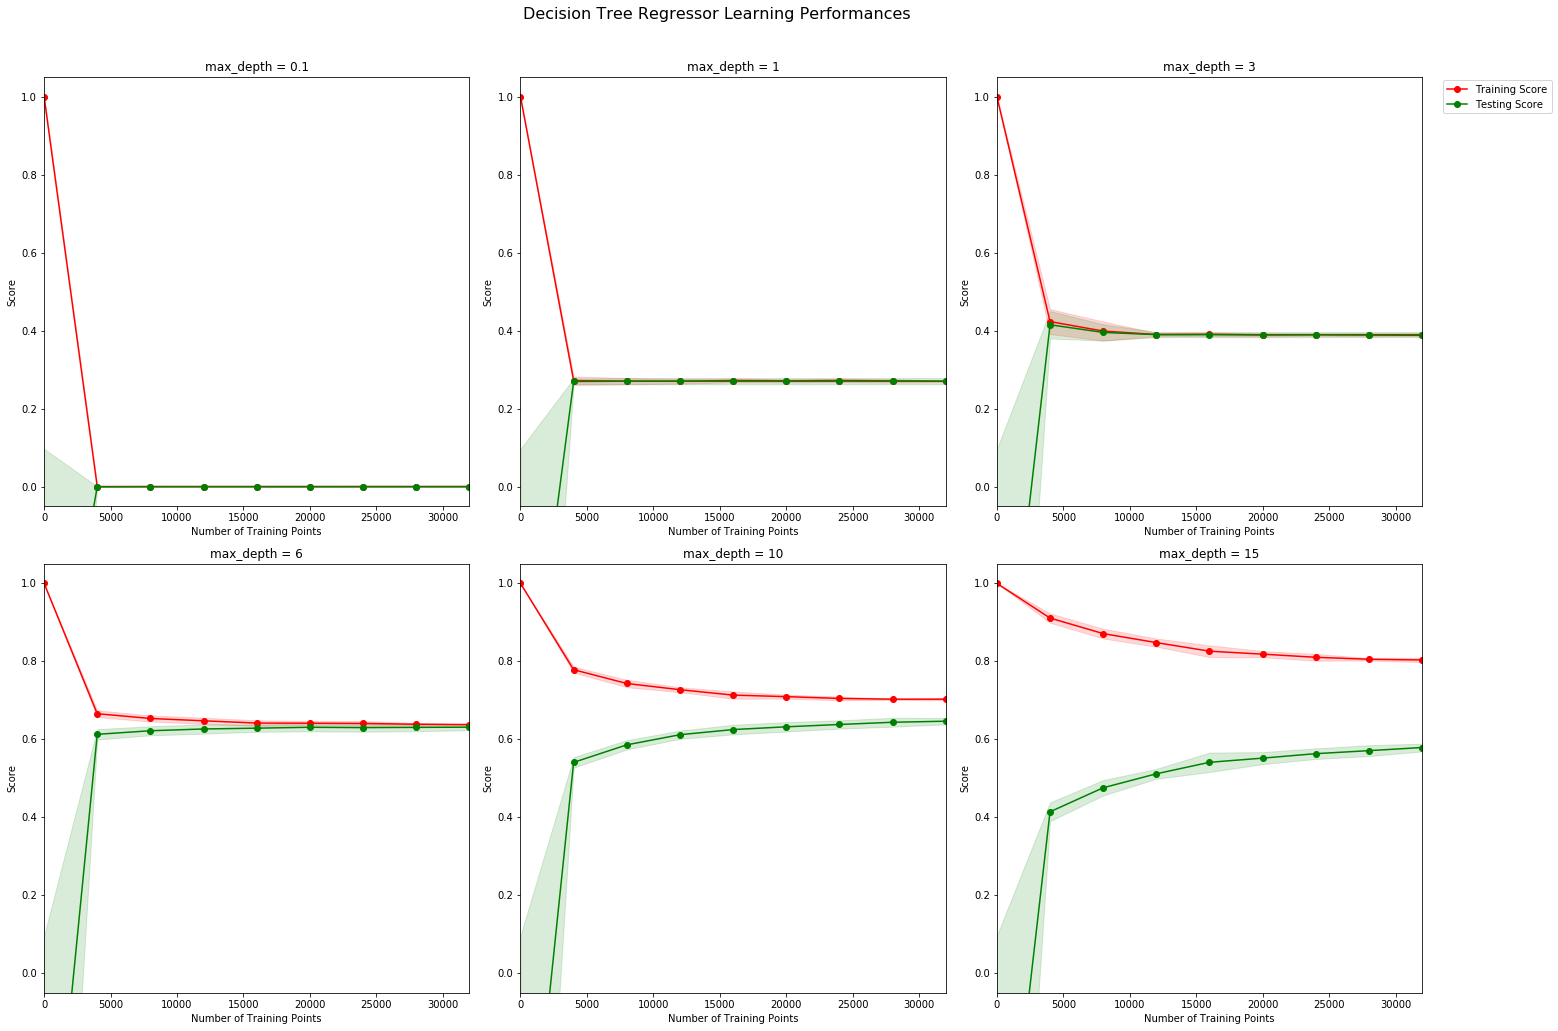

In [0]:
# Produce learning curves for varying training set sizes and maximum depths
ModelLearning(X_train, y_train)

### Validation curves: plotting scores to evaluate models

In [0]:
def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,20)

    # Calculate the training and testing scores
    train_scores, test_scores = curves.validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()

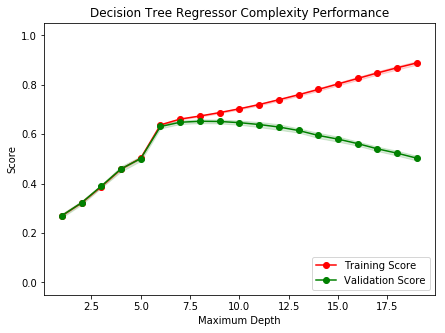

In [0]:
ModelComplexity(X_train, y_train)

##### Complexity Curves

``The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.``

- At max_depth = 1, the model suffers from high bias as the model underfits due to the reason that it oversimplifies the problem and ends up having a high training as well as high validation error, which leads to a low training score (0.27 approx.) and a low validation score (0.27).
    - This is the case of underfitting.
    
- ```Best Guess```: max_depth of 10 results in a model that best generalizes to unseen data

- At max_depth = 15, the model suffers from high variance as it over complicates the problem and ends up memorizing it. Thus, leading to a low training error (and a high training score. as depicted on the complexity graph). Also, the model will have a high testing error and a low testing score.
    - This is the case of Overfitting.
    - That is why, we can visualize from the graph that there is a large difference between the training score and the validation score.

## Evaluating Model Performance

### Optimal Model

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.  What maximum depth does the optimal model have? (Grid Search implemented above)

In [0]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 8 for the optimal model.


In [0]:
# Show predictions
for i, price in enumerate(reg.predict(X_test)):
    print("Predicted Purchasing amount for customer {}: ${:,.2f}".format(i+1, price))

Predicted Purchasing amount for customer 1: $7,829.23
Predicted Purchasing amount for customer 2: $6,340.66
Predicted Purchasing amount for customer 3: $5,863.63
Predicted Purchasing amount for customer 4: $11,601.52
Predicted Purchasing amount for customer 5: $13,179.49
Predicted Purchasing amount for customer 6: $13,179.49
Predicted Purchasing amount for customer 7: $17,886.90
Predicted Purchasing amount for customer 8: $6,340.66
Predicted Purchasing amount for customer 9: $6,340.66
Predicted Purchasing amount for customer 10: $6,340.66
Predicted Purchasing amount for customer 11: $16,657.50
Predicted Purchasing amount for customer 12: $7,829.23
Predicted Purchasing amount for customer 13: $7,344.71
Predicted Purchasing amount for customer 14: $6,340.66
Predicted Purchasing amount for customer 15: $16,762.49
Predicted Purchasing amount for customer 16: $7,243.41
Predicted Purchasing amount for customer 17: $13,348.15
Predicted Purchasing amount for customer 18: $4,583.53
Predicted Pu

Predicted Purchasing amount for customer 1343: $6,340.66
Predicted Purchasing amount for customer 1344: $5,863.63
Predicted Purchasing amount for customer 1345: $13,885.97
Predicted Purchasing amount for customer 1346: $6,340.66
Predicted Purchasing amount for customer 1347: $760.97
Predicted Purchasing amount for customer 1348: $5,863.63
Predicted Purchasing amount for customer 1349: $7,243.41
Predicted Purchasing amount for customer 1350: $13,882.05
Predicted Purchasing amount for customer 1351: $10,006.86
Predicted Purchasing amount for customer 1352: $5,863.63
Predicted Purchasing amount for customer 1353: $5,863.63
Predicted Purchasing amount for customer 1354: $12,766.66
Predicted Purchasing amount for customer 1355: $13,179.49
Predicted Purchasing amount for customer 1356: $11,000.08
Predicted Purchasing amount for customer 1357: $14,119.04
Predicted Purchasing amount for customer 1358: $14,737.89
Predicted Purchasing amount for customer 1359: $6,951.31
Predicted Purchasing amou

Predicted Purchasing amount for customer 1591: $14,737.89
Predicted Purchasing amount for customer 1592: $6,340.66
Predicted Purchasing amount for customer 1593: $7,243.41
Predicted Purchasing amount for customer 1594: $6,340.66
Predicted Purchasing amount for customer 1595: $15,553.87
Predicted Purchasing amount for customer 1596: $14,115.24
Predicted Purchasing amount for customer 1597: $8,663.39
Predicted Purchasing amount for customer 1598: $13,179.49
Predicted Purchasing amount for customer 1599: $13,179.49
Predicted Purchasing amount for customer 1600: $7,829.23
Predicted Purchasing amount for customer 1601: $6,340.66
Predicted Purchasing amount for customer 1602: $11,198.89
Predicted Purchasing amount for customer 1603: $6,340.66
Predicted Purchasing amount for customer 1604: $7,829.23
Predicted Purchasing amount for customer 1605: $6,340.66
Predicted Purchasing amount for customer 1606: $6,340.66
Predicted Purchasing amount for customer 1607: $6,340.66
Predicted Purchasing amou

Predicted Purchasing amount for customer 2842: $11,340.66
Predicted Purchasing amount for customer 2843: $6,340.66
Predicted Purchasing amount for customer 2844: $13,179.49
Predicted Purchasing amount for customer 2845: $5,863.63
Predicted Purchasing amount for customer 2846: $2,146.44
Predicted Purchasing amount for customer 2847: $13,226.03
Predicted Purchasing amount for customer 2848: $13,226.03
Predicted Purchasing amount for customer 2849: $5,863.63
Predicted Purchasing amount for customer 2850: $6,582.34
Predicted Purchasing amount for customer 2851: $10,006.86
Predicted Purchasing amount for customer 2852: $6,340.66
Predicted Purchasing amount for customer 2853: $13,179.49
Predicted Purchasing amount for customer 2854: $5,863.63
Predicted Purchasing amount for customer 2855: $4,309.22
Predicted Purchasing amount for customer 2856: $13,885.97
Predicted Purchasing amount for customer 2857: $2,616.44
Predicted Purchasing amount for customer 2858: $6,951.31
Predicted Purchasing amo

Predicted Purchasing amount for customer 4234: $12,766.66
Predicted Purchasing amount for customer 4235: $6,340.66
Predicted Purchasing amount for customer 4236: $7,243.41
Predicted Purchasing amount for customer 4237: $11,617.58
Predicted Purchasing amount for customer 4238: $13,179.49
Predicted Purchasing amount for customer 4239: $6,340.66
Predicted Purchasing amount for customer 4240: $7,344.71
Predicted Purchasing amount for customer 4241: $12,766.66
Predicted Purchasing amount for customer 4242: $14,119.04
Predicted Purchasing amount for customer 4243: $7,344.71
Predicted Purchasing amount for customer 4244: $17,060.48
Predicted Purchasing amount for customer 4245: $10,006.86
Predicted Purchasing amount for customer 4246: $14,119.04
Predicted Purchasing amount for customer 4247: $6,340.66
Predicted Purchasing amount for customer 4248: $13,226.03
Predicted Purchasing amount for customer 4249: $2,146.44
Predicted Purchasing amount for customer 4250: $7,344.71
Predicted Purchasing a

Predicted Purchasing amount for customer 5341: $5,863.63
Predicted Purchasing amount for customer 5342: $5,863.63
Predicted Purchasing amount for customer 5343: $760.97
Predicted Purchasing amount for customer 5344: $4,583.53
Predicted Purchasing amount for customer 5345: $11,617.58
Predicted Purchasing amount for customer 5346: $10,006.86
Predicted Purchasing amount for customer 5347: $12,766.66
Predicted Purchasing amount for customer 5348: $7,344.71
Predicted Purchasing amount for customer 5349: $14,038.13
Predicted Purchasing amount for customer 5350: $12,766.66
Predicted Purchasing amount for customer 5351: $17,886.90
Predicted Purchasing amount for customer 5352: $9,628.03
Predicted Purchasing amount for customer 5353: $6,340.66
Predicted Purchasing amount for customer 5354: $6,340.66
Predicted Purchasing amount for customer 5355: $7,344.71
Predicted Purchasing amount for customer 5356: $6,340.66
Predicted Purchasing amount for customer 5357: $9,482.90
Predicted Purchasing amount

Predicted Purchasing amount for customer 6504: $9,249.63
Predicted Purchasing amount for customer 6505: $7,243.41
Predicted Purchasing amount for customer 6506: $5,118.33
Predicted Purchasing amount for customer 6507: $760.97
Predicted Purchasing amount for customer 6508: $13,179.49
Predicted Purchasing amount for customer 6509: $13,179.49
Predicted Purchasing amount for customer 6510: $7,344.71
Predicted Purchasing amount for customer 6511: $14,737.89
Predicted Purchasing amount for customer 6512: $9,413.49
Predicted Purchasing amount for customer 6513: $14,201.15
Predicted Purchasing amount for customer 6514: $13,012.00
Predicted Purchasing amount for customer 6515: $15,669.90
Predicted Purchasing amount for customer 6516: $6,340.66
Predicted Purchasing amount for customer 6517: $7,829.23
Predicted Purchasing amount for customer 6518: $7,344.71
Predicted Purchasing amount for customer 6519: $6,340.66
Predicted Purchasing amount for customer 6520: $12,244.14
Predicted Purchasing amoun

Predicted Purchasing amount for customer 7853: $5,863.63
Predicted Purchasing amount for customer 7854: $11,198.89
Predicted Purchasing amount for customer 7855: $5,863.63
Predicted Purchasing amount for customer 7856: $14,038.13
Predicted Purchasing amount for customer 7857: $13,226.03
Predicted Purchasing amount for customer 7858: $16,657.50
Predicted Purchasing amount for customer 7859: $7,829.23
Predicted Purchasing amount for customer 7860: $7,829.23
Predicted Purchasing amount for customer 7861: $12,879.06
Predicted Purchasing amount for customer 7862: $6,340.66
Predicted Purchasing amount for customer 7863: $6,340.66
Predicted Purchasing amount for customer 7864: $6,340.66
Predicted Purchasing amount for customer 7865: $6,340.66
Predicted Purchasing amount for customer 7866: $17,886.90
Predicted Purchasing amount for customer 7867: $9,595.01
Predicted Purchasing amount for customer 7868: $6,340.66
Predicted Purchasing amount for customer 7869: $7,829.23
Predicted Purchasing amou

Predicted Purchasing amount for customer 9339: $6,340.66
Predicted Purchasing amount for customer 9340: $13,179.49
Predicted Purchasing amount for customer 9341: $2,146.44
Predicted Purchasing amount for customer 9342: $7,829.23
Predicted Purchasing amount for customer 9343: $13,179.49
Predicted Purchasing amount for customer 9344: $15,553.87
Predicted Purchasing amount for customer 9345: $16,657.50
Predicted Purchasing amount for customer 9346: $16,657.50
Predicted Purchasing amount for customer 9347: $6,340.66
Predicted Purchasing amount for customer 9348: $7,344.71
Predicted Purchasing amount for customer 9349: $16,823.57
Predicted Purchasing amount for customer 9350: $6,340.66
Predicted Purchasing amount for customer 9351: $13,179.49
Predicted Purchasing amount for customer 9352: $16,657.50
Predicted Purchasing amount for customer 9353: $14,741.82
Predicted Purchasing amount for customer 9354: $12,766.66
Predicted Purchasing amount for customer 9355: $7,829.23
Predicted Purchasing 

##### The deeper the tree, the more complex the decision rules and the fitter the model.

#### Sensitivity

An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted.

Run the code cell below to run the fit_model function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.

In [0]:
def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[1]])[0]
        prices.append(pred)
        
        # Result
        print("Trial {}: ${:,.2f}".format(k + 1, pred))

    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

In [0]:
from sklearn.model_selection import train_test_split
PredictTrials(X_train, y_train, fit_model, X_test)

Trial 1: $6,258.26
Trial 2: $6,186.24
Trial 3: $6,334.56
Trial 4: $6,343.38
Trial 5: $6,177.11
Trial 6: $6,347.96
Trial 7: $6,333.06
Trial 8: $6,339.79
Trial 9: $6,348.59
Trial 10: $6,357.37

Range in prices: $180.26


## Linear Regression Model

In [0]:
from sklearn.linear_model import Ridge, Lasso

In [0]:
def ModelLearning_Linear(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)
    
    par = 0.01

    # Create the figure window
    fig = plt.figure()
    #par_range = np.logspace(-7, 3, 6)
    #use par_range.tolist() in for loop
        
    # Create a Decision tree regressor at max_depth = depth
    regressor = Lasso(alpha = par, copy_X=True, fit_intercept=True, normalize = True)
    regressor.fit(X,y)

    # Calculate the training and testing scores
    sizes, train_scores, test_scores = curves.learning_curve(regressor, X, y, \
        cv = cv, train_sizes=train_sizes, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Subplot the learning curve 
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
    ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
    ax.fill_between(sizes, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    ax.fill_between(sizes, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')

    # Labels
    ax.set_title('alpha = %s'%(par))
    ax.set_xlabel('Number of Training Points')
    ax.set_ylabel('Score')
    ax.set_xlim([0, X.shape[0]*0.8])
    ax.set_ylim([-0.05, 1.05])

    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Linear Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()

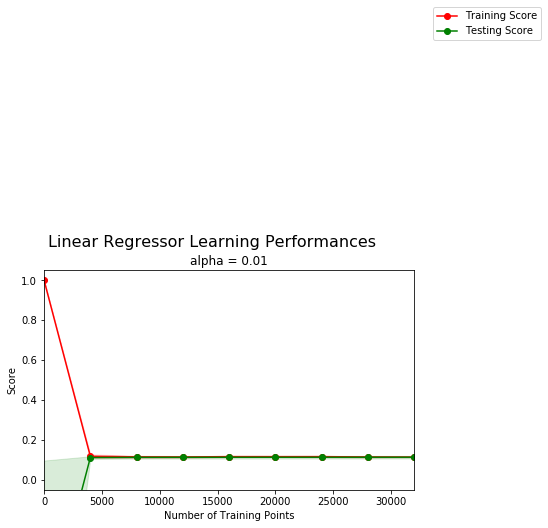

In [0]:
ModelLearning_Linear(X_train, y_train)

### Above model analysis 
The linear regression model applied above has very low r2 score which implies that our data cannot be fitted linearly. 